# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)

In [119]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [120]:
countries = pd.read_csv("countries.csv", decimal = ',')

In [121]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [122]:
df=countries.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline_ratio     227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones_per_1000     223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [123]:
colunas=list(df.columns)

In [124]:
#Tirando os espaçoes das colunas tipo 'object'
df['Country']=df.apply(lambda x: x['Country'].strip() ,axis=1)
df['Region']=df.apply(lambda x: x['Region'].strip() ,axis=1)

In [125]:
sorted(list(df['Region'].unique()))

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [126]:
def q1():
    return sorted(list(df['Region'].unique()))

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [127]:
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
discretizer.fit(df[['Pop_density']])
score_bins = discretizer.transform(df[["Pop_density"]])
#score_bins

In [128]:
df2 = pd.concat([df, pd.DataFrame(score_bins, columns=["Score_Pop_density"])], axis=1)

In [129]:
df2[df2['Score_Pop_density'] == 9]['Country'].nunique()

23

In [130]:
def q2():
    return df2[df2['Score_Pop_density'] == 9]['Country'].nunique()

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [131]:
one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
Region_encoded = one_hot_encoder.fit_transform(df[["Region"]])
Region_encoded.shape

(227, 11)

In [132]:
print(df['Climate'].value_counts())
print(df['Region'].value_counts())

2.0    111
3.0     48
1.0     29
1.5      8
4.0      6
2.5      3
Name: Climate, dtype: int64
SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
ASIA (EX. NEAR EAST)    28
WESTERN EUROPE          28
OCEANIA                 21
NEAR EAST               16
EASTERN EUROPE          12
C.W. OF IND. STATES     12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: Region, dtype: int64


In [133]:
Climate_encoded = one_hot_encoder.fit_transform(df[["Climate"]].dropna())
Climate_encoded.shape

(205, 6)

In [134]:
def q3():
    return Region_encoded.shape[1]+Climate_encoded.shape[1]+1

Necessário uma analise maior dos dados e definição de um objetivo para saber como tratar os dados faltantes da coluna 'Climate'. Caso preenchido com a média ou com zero (por exemplo), teriamos mais uma categoria sendo criada (por isso somado 1 na resposta). Agora se preenchido com a moda ou dropado as colunas, não seria criado uma categoria a mais.

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [135]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())])

In [136]:
pipeline_transformation = num_pipeline.fit_transform(df[colunas[2:]])

In [137]:
df3 = pd.DataFrame(pipeline_transformation, columns=colunas[2:])


In [138]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [139]:
test_country=np.array(test_country).reshape(1,20)
df_test=pd.DataFrame(test_country,columns=colunas)
pipeline_test=num_pipeline.transform(df_test.iloc[:,2:])
pipeline_test_df=pd.DataFrame(pipeline_test, columns=colunas[2:])
float(pipeline_test_df['Arable'].round(3))

-1.047

In [140]:
def q4():
    return float(pipeline_test_df['Arable'].round(3))

In [141]:
lista=[1,2,3]

In [142]:
type(lista)

list

In [143]:
x=np.array(lista)

In [144]:
x.reshape(1,3)

array([[1, 2, 3]])

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

*Devemos julgar com cautela sua remoção de outliers: alguns outliers são dados autênticos e devem ser estudados com atenção. Por exemplo, a remoção de uma medição muito alta na temperatura de um reator seria um erro, pois essa medição pode estar nos indicando um potencial problema com o dispositivo.*

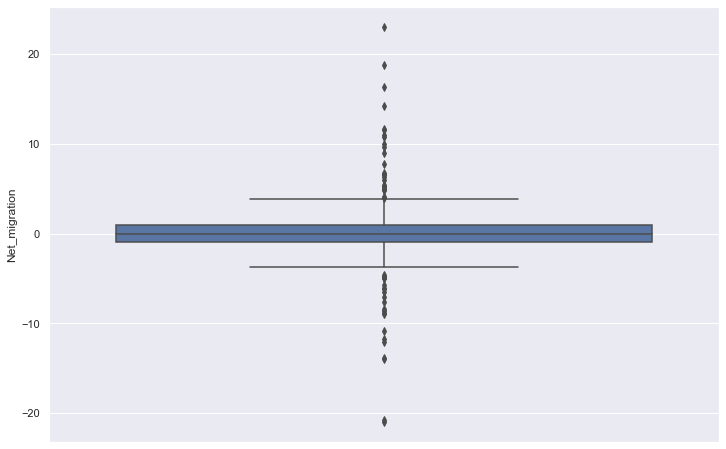

In [145]:
#Boxplot para identificar outliers inferiores e superiores

sns.boxplot(df['Net_migration'], orient="vertical");

In [146]:
q_1=df['Net_migration'].quantile(0.25) #primeiro quartil
q_3=df['Net_migration'].quantile(0.75) #segundo quartil
iqr=q_3-q_1 #distancia interquartil

intervalo_iqr=[q_1-1.5*iqr, q_3+1.5*iqr]
intervalo_iqr

[-3.8149999999999995, 3.885]

In [147]:
df['Outlier']=pd.cut(df['Net_migration'], bins=(-1000,intervalo_iqr[0],intervalo_iqr[1],1000), labels=
                     ('inferior', 'não', 'superior'))

In [148]:
outliers_abaixo=len(df[df['Outlier'] == 'inferior']['Outlier'])
outliers_acima=len(df[df['Outlier'] == 'superior']['Outlier'])



In [149]:
def q5():
    return (outliers_abaixo, outliers_acima,False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [150]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

In [151]:
from sklearn.datasets import fetch_20newsgroups

In [152]:
newsgroup = sk.datasets.fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
len(newsgroup.data)

1773

In [153]:
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)
newsgroups_counts

<1773x27335 sparse matrix of type '<class 'numpy.int64'>'
	with 227238 stored elements in Compressed Sparse Row format>

In [154]:
words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in
                    [u"phone"]])
words_idx

[19211]

In [155]:
n_phone=pd.DataFrame(newsgroups_counts[:, words_idx].toarray(), columns=np.array(count_vectorizer.get_feature_names())[words_idx]).sum()

In [156]:
def q6():
    return n_phone[0]

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [157]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(newsgroup.data)
newsgroup_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)
newsgroup_tfidf_vectorized.shape

(1773, 27335)

In [158]:
newsgroup_tfidf_vectorized[0,words_idx]

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [159]:
tf_idf_phone=pd.DataFrame(newsgroup_tfidf_vectorized[:, words_idx].toarray(), 
             columns=np.array(count_vectorizer.get_feature_names())[words_idx]).sum()

In [160]:
def q7():
    return round(tf_idf_phone[0],3)

In [161]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

In [162]:
q2()

23

In [163]:
q3()

18

In [164]:
q4()

-1.047

In [165]:
q5()

(24, 26, False)

In [166]:
q6()

213

In [167]:
q7()

8.888